# Forecasting mit Prophet - Advanced

Lade die benötigten Python-Packages:

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


Lade die Daten als pandas-Dataframe:

In [2]:
df_complete = pd.read_csv('../data/avocado.csv')

Verschaffe dir einen Überblick über die Daten:

In [4]:
df_complete.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df_complete.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Bilde die Summe der verkauften Volumes je Timestamp:

In [6]:
df = df_complete.groupby(['Date']).sum()[['Total Volume']].reset_index()

Überführe das Dataframe in das Prophet-Format:

In [7]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2015-01-04,8.467434e+07
1,2015-01-11,7.855581e+07
2,2015-01-18,7.838878e+07
3,2015-01-25,7.646628e+07
4,2015-02-01,1.194532e+08


Plotte die Daten:

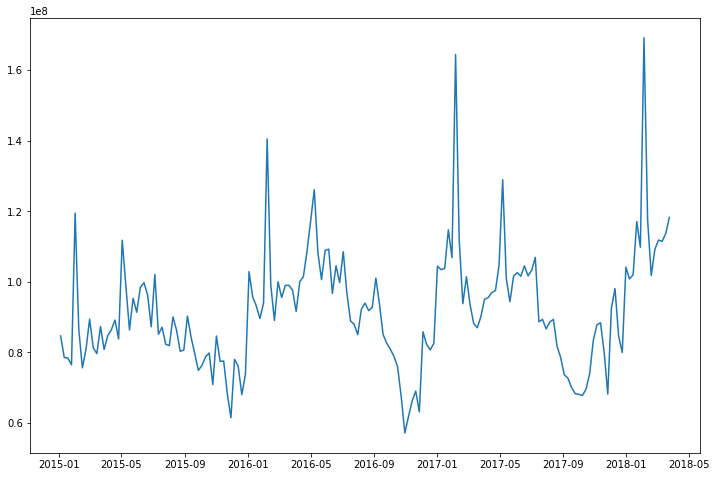

In [8]:
fig = plt.figure(figsize=(12,8))
plt.plot(df['ds'], df['y'])
plt.show()

Erstellen einen Forecast mit Prophet:

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds
0   2015-01-04
1   2015-01-11
2   2015-01-18
3   2015-01-25
4   2015-02-01
..         ...
212 2019-01-27
213 2019-02-03
214 2019-02-10
215 2019-02-17
216 2019-02-24

[217 rows x 1 columns]


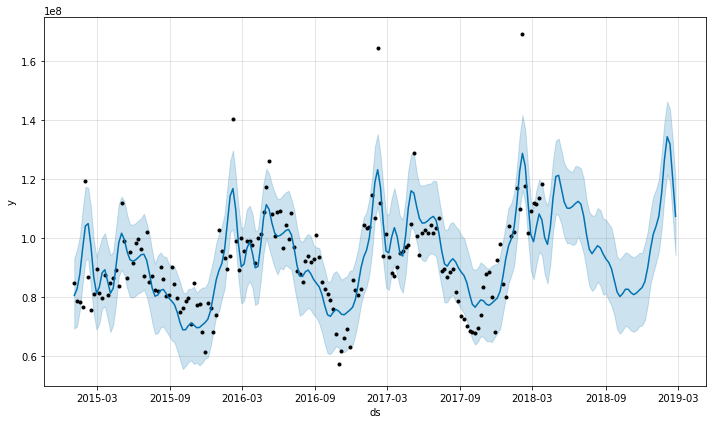

In [9]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(48, freq='W')
print(future)
forecast = m.predict(future)
fig = m.plot(forecast)

Zeige die Komponenten des Regressions-Modells an:

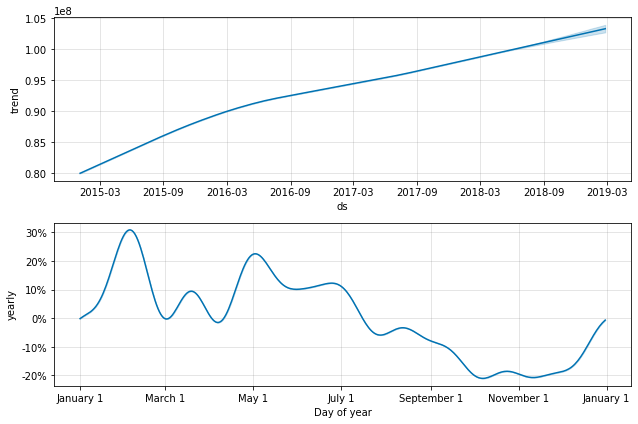

In [10]:
fig = m.plot_components(forecast)

## Verfeinerung des Modells

Bestimme Feiertage, die einen Einfluss auf den Avocadokonsum haben könnten:

In [12]:
cinco_de_mayo = pd.DataFrame({
  'holiday': 'cinco_de_mayo',
  'ds': pd.to_datetime(['2015-05-10', '2016-05-08', '2017-05-07','2018-05-06','2019-05-05']),
  'lower_window': 0,
  'upper_window': 0,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2015-02-01', '2016-02-07', '2017-02-05','2018-02-04','2019-02-03']),
  'lower_window': 0,
  'upper_window': 0,
})
holidays = pd.concat((cinco_de_mayo, superbowls))
print(holidays)

         holiday         ds  lower_window  upper_window
0  cinco_de_mayo 2015-05-10             0             0
1  cinco_de_mayo 2016-05-08             0             0
2  cinco_de_mayo 2017-05-07             0             0
3  cinco_de_mayo 2018-05-06             0             0
4  cinco_de_mayo 2019-05-05             0             0
0      superbowl 2015-02-01             0             0
1      superbowl 2016-02-07             0             0
2      superbowl 2017-02-05             0             0
3      superbowl 2018-02-04             0             0
4      superbowl 2019-02-03             0             0


Es wird davon ausgegangen, dass die Saisonalität einen Einfluss auf die Verkaufszahlen hat. Angeblich geht die Avocado-Saison in den USA von Mitte April bis Mitte Oktober:

In [13]:
df['season'] = df['ds'].apply(lambda x: x.month > 4 and x.month < 10).astype(int)

In [14]:
df.head()

,ds,y,season
0,2015-01-04,8.467434e+07,0
1,2015-01-11,7.855581e+07,0
2,2015-01-18,7.838878e+07,0
3,2015-01-25,7.646628e+07,0
4,2015-02-01,1.194532e+08,0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds  season
0   2015-01-04       0
1   2015-01-11       0
2   2015-01-18       0
3   2015-01-25       0
4   2015-02-01       0
..         ...     ...
212 2019-01-27       0
213 2019-02-03       0
214 2019-02-10       0
215 2019-02-17       0
216 2019-02-24       0

[217 rows x 2 columns]


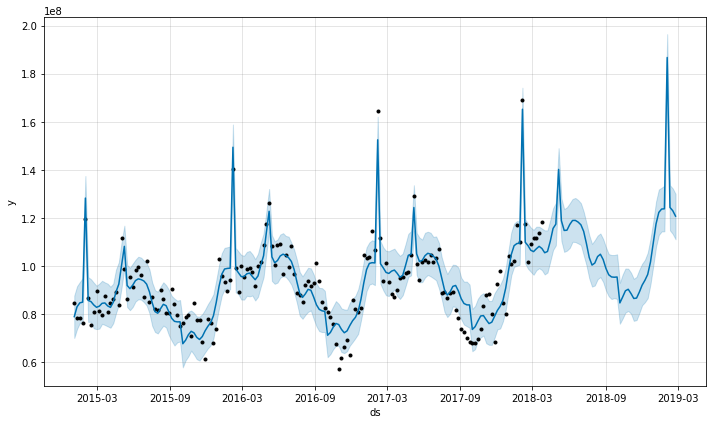

In [15]:
m = Prophet(holidays=holidays, seasonality_mode='multiplicative')
m.add_regressor('season')
m.fit(df)
future = m.make_future_dataframe(48, freq='W')
future['season'] = future['ds'].apply(lambda x: x.month > 4 and x.month < 10).astype(int)
print(future)
forecast = m.predict(future)
fig = m.plot(forecast)

Die Komponenten des Modells sehen wie folgt aus:

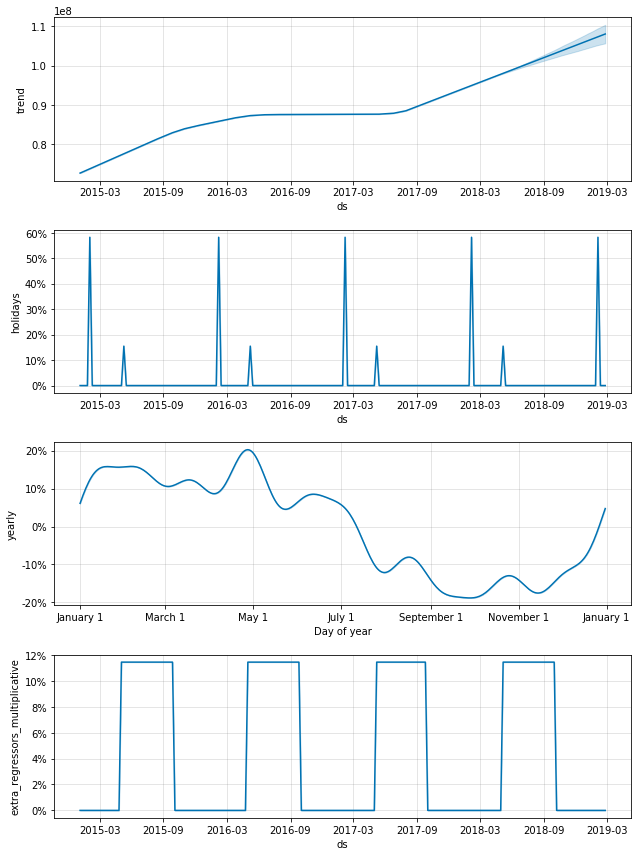

In [16]:
fig = m.plot_components(forecast)